In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
os.chdir("C:\\Users\\Seijsener\\Ironhack\\unit1\\week_3\\day_2_A\\lab-customer-analysis-round-7\\files_for_lab\\csv_files")

In [3]:
df = pd.read_csv("marketing_customer_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
# Specify your dependent variable
dependent_variable = 'Total Claim Amount'

# Check initial VIF
initial_vif = calculate_vif(df, dependent_variable)
if initial_vif is not None:
    print("Initial VIF:")
    print(initial_vif)

    # Perform stepwise regression
    final_model = stepwise_regression(df, dependent_variable)

    # Display the final model summary
    print("\nFinal Model Summary:")
    print(final_model.summary())


Initial VIF:
                        Variable        VIF
0                          const  17.177738
1        Customer Lifetime Value   1.190178
2                         Income   1.002301
3           Monthly Premium Auto   1.188198
4        Months Since Last Claim   1.002828
5  Months Since Policy Inception   1.002441
6      Number of Open Complaints   1.001420
7             Number of Policies   1.001295

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     3277.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:21:22   Log-Likelihood:                -61427.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:   

In [8]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.00

In [9]:
# Specify your dependent variable
dependent_variable = 'Total Claim Amount'

# Check initial VIF
initial_vif = calculate_vif(df, dependent_variable)
if initial_vif is not None:
    print("Initial VIF:")
    print(initial_vif)

    # Remove 'Monthly Premium Auto' from the independent variables
    df_reduced = df.drop('Monthly Premium Auto', axis=1)

    # Perform stepwise regression on the reduced dataset
    final_model = stepwise_regression(df_reduced, dependent_variable)

    # Display the final model summary
    print("\nFinal Model Summary:")
    print(final_model.summary())


Initial VIF:
                        Variable        VIF
0                          const  17.177738
1        Customer Lifetime Value   1.190178
2                         Income   1.002301
3           Monthly Premium Auto   1.188198
4        Months Since Last Claim   1.002828
5  Months Since Policy Inception   1.002441
6      Number of Open Complaints   1.001420
7             Number of Policies   1.001295

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:45:36   Log-Likelihood:                -63850.
No. Observations:                9134   AIC:                         1.277e+05
Df Residuals:   

In [37]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame, vif_threshold=5):
    
    numeric_cols = data_frame.select_dtypes(include=[np.number]).columns
    
    df_numeric = data_frame[numeric_cols]
    
    df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    df_numeric = df_numeric.dropna()
    
    non_numeric_cols = df_numeric.columns[df_numeric.dtypes == 'O']
    if non_numeric_cols.any():
        df_numeric = df_numeric.drop(columns=non_numeric_cols)
    
    X = df_numeric.drop(columns=[df_numeric.columns[-1]])  # Assuming the dependent variable is the last column
    X_with_constant = sm.add_constant(X)
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])][1:]
    
    high_vif_vars = vif_data[vif_data['VIF'] > vif_threshold]['Variable'].tolist()
    
    if high_vif_vars:
        print(f"Variables with high VIF: {high_vif_vars}")
    else:
        print("No variables with high VIF found.")
    
    return vif_data


initial_vif = calculate_vif(df)
if initial_vif is not None:
    print("Initial VIF:")
    print(initial_vif)


C:\Users\Seijsener\AppData\Local\Temp\ipykernel_18676\1108338379.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)


No variables with high VIF found.
Initial VIF:
                        Variable       VIF
0        Customer Lifetime Value  1.190178
1                         Income  1.002301
2           Monthly Premium Auto  1.188198
3        Months Since Last Claim  1.002828
4  Months Since Policy Inception  1.002441
5      Number of Open Complaints  1.001420
6             Number of Policies  1.001295


In [44]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(data_frame, vif_threshold=5):
    # Separate numeric and non-numeric columns
    numeric_columns = data_frame.select_dtypes(include=[np.number]).columns
    non_numeric_columns = data_frame.select_dtypes(exclude=[np.number]).columns

    # Calculate VIF for numeric columns
    X_numeric = data_frame[numeric_columns]
    X_numeric_with_constant = add_constant(X_numeric)
    vif_data_numeric = pd.DataFrame()
    vif_data_numeric["Variable"] = X_numeric_with_constant.columns
    vif_data_numeric["VIF"] = [variance_inflation_factor(X_numeric_with_constant.values, i) for i in range(X_numeric_with_constant.shape[1])]
    
    # Filter variables with VIF exceeding the threshold
    high_vif_vars_numeric = vif_data_numeric[vif_data_numeric['VIF'] > vif_threshold]['Variable'].tolist()

    if high_vif_vars_numeric:
        print("High VIF for numeric variables:")
        print(vif_data_numeric[vif_data_numeric['VIF'] > vif_threshold])

    # Calculate VIF for non-numeric columns
    vif_data_non_numeric = pd.DataFrame()
    vif_data_non_numeric["Variable"] = non_numeric_columns
    vif_data_non_numeric["VIF"] = [np.nan] * len(non_numeric_columns)

    # Combine numeric and non-numeric results
    vif_data = pd.concat([vif_data_numeric, vif_data_non_numeric], ignore_index=True)

    if high_vif_vars_numeric:
        print("\nVariables with high VIF:")
        print(vif_data[vif_data['VIF'] > vif_threshold])

    if high_vif_vars_numeric or (vif_data_non_numeric['VIF'].notna().any()):
        return vif_data

    print("No variables with high VIF found.")
    return None

# Calculate VIF
calculate_vif(df)


High VIF for numeric variables:
  Variable        VIF
0    const  17.306763

Variables with high VIF:
  Variable        VIF
0    const  17.306763


,Variable,VIF
0,const,17.306763
1,Customer Lifetime Value,1.190707
2,Income,1.248748
3,Monthly Premium Auto,2.020101
4,Months Since Last Claim,1.002881
5,Months Since Policy Inception,1.002642
6,Number of Open Complaints,1.001459
7,Number of Policies,1.001304
8,Total Claim Amount,2.077546
9,Customer,NaN


In [48]:
y = df['Total Claim Amount']

X = df.drop('Total Claim Amount', axis=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (9134, 23)
Shape of y: (9134,)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (6393, 23)
Shape of X_test: (2741, 23)
Shape of y_train: (6393,)
Shape of y_test: (2741,)


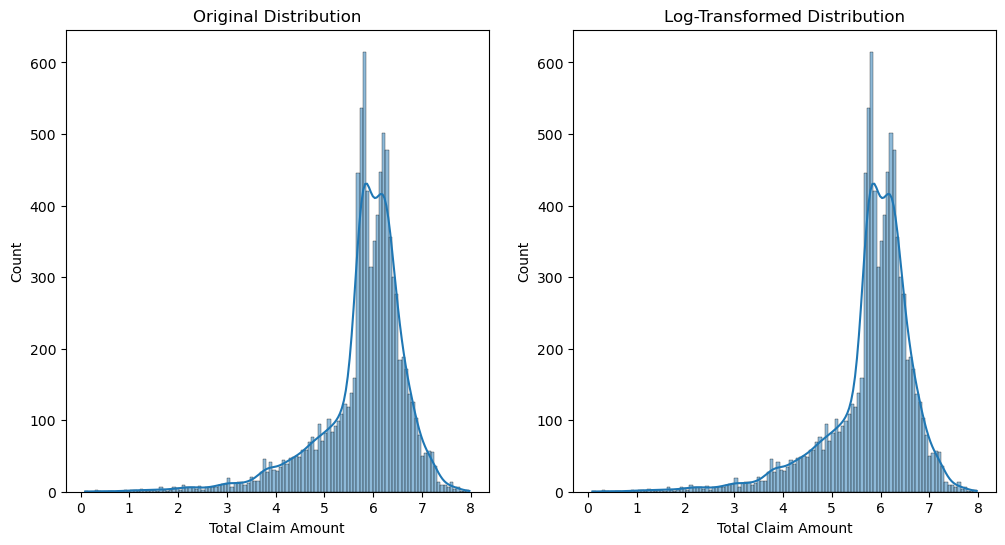

In [52]:
import matplotlib.pyplot as plt
df['Total Claim Amount'] = np.log1p(df['Total Claim Amount'])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Total Claim Amount'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Total Claim Amount'], kde=True)
plt.title('Log-Transformed Distribution')

plt.show()


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()


model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 39369.83675392663
R-squared: 0.5177292794508799
